<a href="https://colab.research.google.com/github/mLucas55/diabetes-nn/blob/main/first_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for scaling data set
from sklearn.preprocessing import StandardScaler
# for selecting the same amount of 1 and 0 outcomes
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
# for designating training sets and test sets
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
row_count = len(df)
print("Total row count:", row_count)
df.head()

Total row count: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


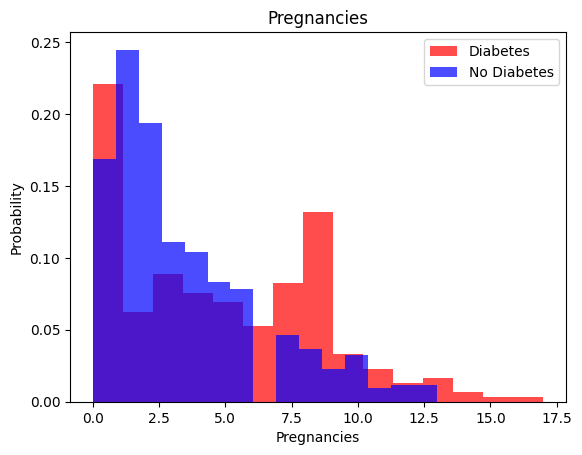

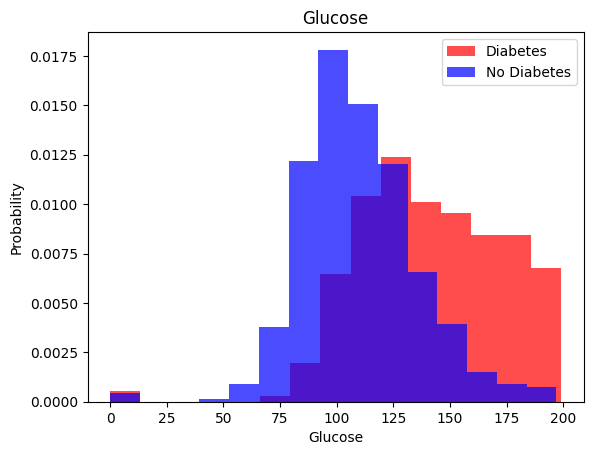

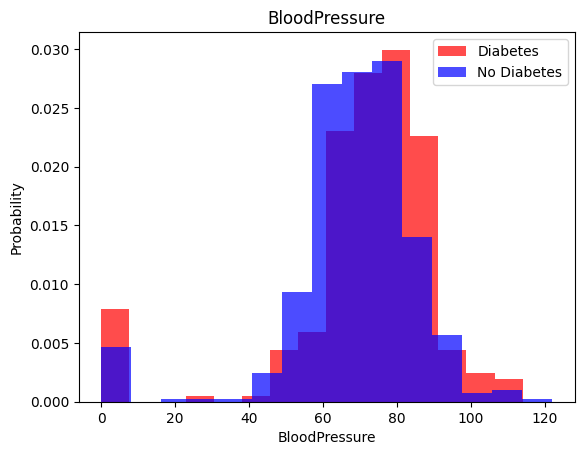

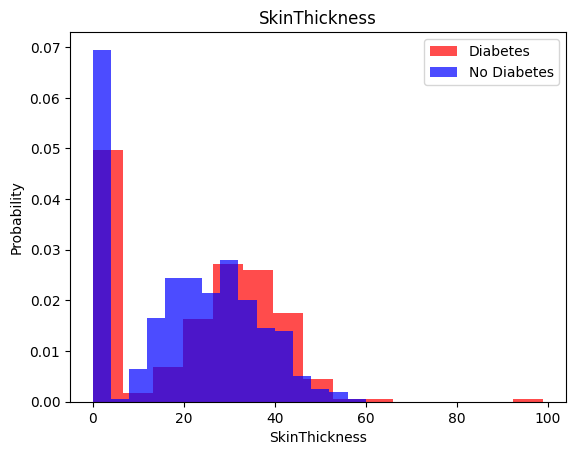

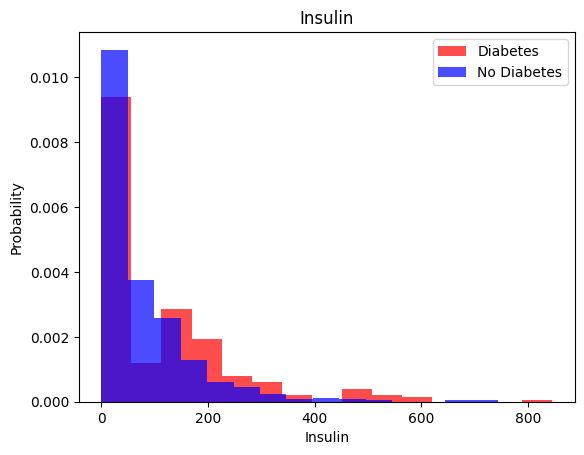

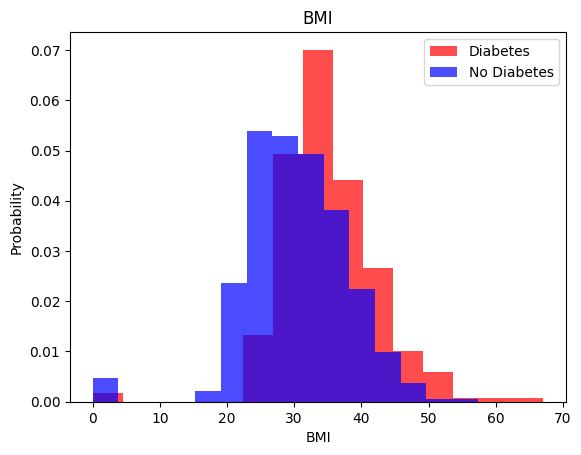

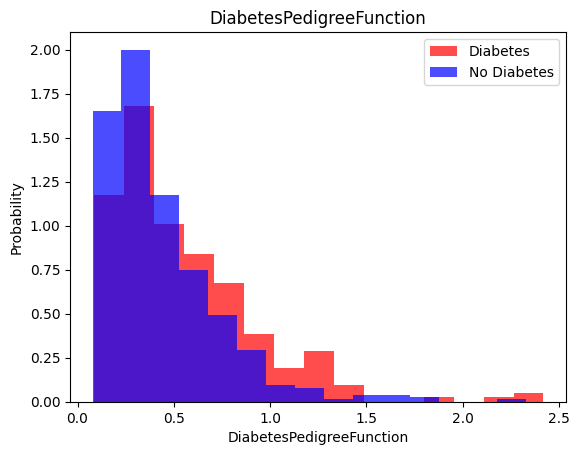

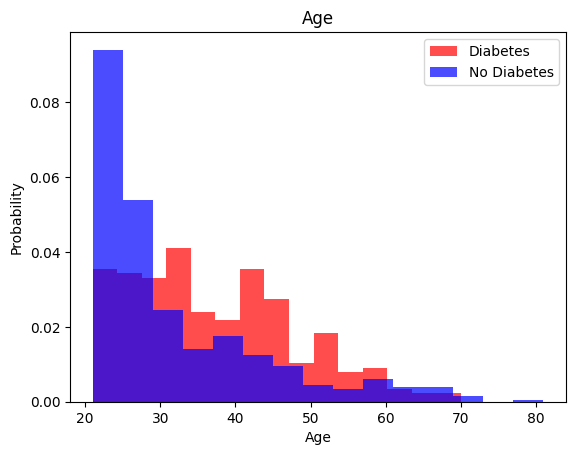

In [4]:
# iterates through every column up until last column as it is the outcome
for i in range(len(df.columns[:-1])):
  # name of column at an index
  label = df.columns[i]

  # both histograms have normalized data through density = true
  # this means the y axis is the probability

  # plots rows where outcome = 1 (has diabetes)
  plt.hist(df[df['Outcome']==1][label], color='red', label="Diabetes", alpha=0.7, density=True, bins=15)
  # plots rows where outcome = 0
  plt.hist(df[df['Outcome']==0][label], color='blue', label="No Diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

These histograms can reveal trends, but ultimately the data is not separable. This is where a machine learning via a neural network can be used to predict if a person has diabetes

In [5]:
X = df[df.columns[:-1]].values
# outcome column
Y = df[df.columns[-1]].values

In [11]:
# scale values in data set as some graphs have ranges 0-800 & others 0-2.5 which could affect accuracy
scaler = StandardScaler()
X = scaler.fit_transform(X)
# turn scaled data back into DataFrame --> reshaping is used at Y is a 1x1
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [10]:
over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)

In [13]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [14]:
# create training and test sets
# 60% = training
# 20% = validation
# 20% = test
# random_state = 0 to get the same split every time
X_train, X_temp, Y_train, Y_temp, = train_test_split(X, Y, test_size=0.4, random_state=0)

# take 40% of temp data set and split it 50/50
X_valid, X_test, Y_valid, Y_test, = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0)

In [15]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(16, activation='relu'), # if x <= 0  --> 0, x > 0 --> x
                              tf.keras.layers.Dense(16, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid') # binary classifcation

])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryFocalCrossentropy(), # because we are using binary classification
              metrics=['accuracy'])

In [17]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.4983


[0.24176359176635742, 0.4983333349227905]

In [18]:
model.evaluate(X_valid, Y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.5500


[0.24271629750728607, 0.550000011920929]

Above are the pretraining results

In [19]:
model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.5167 - val_loss: 0.1715 - val_accuracy: 0.6200
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.5867 - val_loss: 0.1517 - val_accuracy: 0.6800
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.6633 - val_loss: 0.1409 - val_accuracy: 0.7350
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.6950 - val_loss: 0.1336 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.7017 - val_loss: 0.1284 - val_accuracy: 0.7450
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.7300 - val_loss: 0.1251 - val_accuracy: 0.7550
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.7333 - val_loss: 0.1223 - val_accuracy: 0.7550
Epoch 8/20
38/38 [==

In [20]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.7850


[0.1176254153251648, 0.7850000262260437]